In [1]:
#Data downloaded from https://figshare.com/articles/Recordings_of_ten_thousand_neurons_in_visual_cortex_in_response_to_2_800_natural_images/6845348

In [47]:
from scipy import io
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA

In [7]:
dat=io.loadmat('/media/maria/DATA1/Documents/NeuralData/natimg32_M170717_MP033_2017-08-25 (1).mat')

In [14]:
y=dat['stim']['istim'][0][0].flatten()
X=dat['stim']['resp'][0][0]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33)

In [19]:
clf=MultinomialNB().fit(X_train,y_train)

In [22]:
pred=clf.predict(X_test)
accuracy_score(pred,y_test)

0.997131931166348

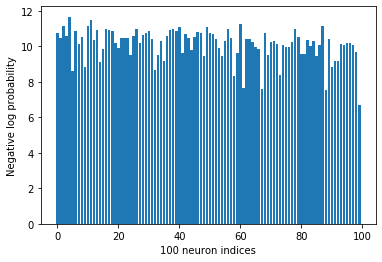

In [66]:
probs=-clf.feature_log_prob_
plt.bar( x= np.arange(100),height=probs[2,:100].flatten())
plt.xlabel('100 neuron indices')
plt.ylabel('Negative log probability')
plt.show()

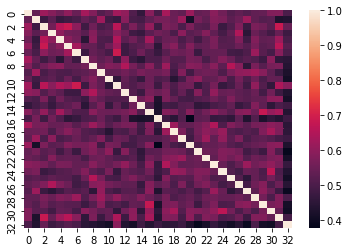

In [64]:
corrs=np.corrcoef(probs)
sns.heatmap(corrs)